<a href="https://colab.research.google.com/github/LuisMig-code/Kevin_De_Bruyne_e_Data_Science/blob/main/Analise_Kevin_De_Bruyne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como Kevin De Bruyne usou Ciência de Dados a seu favor

Kevin De Bruyne é hoje um dos maiores Meio de Campo da história do futebol. Defendendo a seleção belga os número são excelentes , assim como o atual club , Manchester City. Sendo um dos maiores futebolistas do seu pais e de sua equipe.

Em 2020 Kevin De Bruyne estava na posição 4 do [ranking de melhores jogadores do mundo](https://globoesporte.globo.com/futebol/futebol-internacional/noticia/jornal-divulga-ranking-final-dos-100-melhores-do-mundo-com-lewandowski-em-1o-neymar-e-o-9o.ghtml) , com um [valor de mercado](https://www.transfermarkt.com/manchester-city/startseite/verein/281) de 100 milhões € , sendo o mais caro do Manchester City.

<img src="https://wallpapercave.com/wp/wp1956971.jpg" width = 1000>

Em Abril de 2021 o Portal OneFootball postou uma [notícia](https://onefootball.com/pt-br/noticias/kevin-de-bruyne-utilizou-a-tecnologia-para-ajudar-na-renovacao-de-contrato-com-o-manchester-city-32753172?variable=2021-04-10T09:46:55Z&_branch_match_id=link-909424405352431046) intitulada : "**Kevin de Bruyne utilizou a tecnologia para ajudar na renovação de contrato com o Manchester City**" , foi pensando nisso que fiz este artigo, afinal : "Como ele usou a Ciência de Dados para renovar um contrato milionário? " . De Bruyne não tem empresário , apenas muita habilidade, o fundamental.

## Entendendo o Problema:

A questão aqui é simples , usar dados públicos para fazer com que De Bruyne consiga um renovação de contrato , tentando imitar o feito na vida real. Para isso ultilizaremos dados de **características físicas** do game FIFA 21 (não existem dados padronizados/oficiais da FIFA de aspectos físicos dos jogadores) e **dados estatísticos das temporadas 2019/2020 e 2020/2021 das diferentes competições que ele participou**.

## Origem dos Dados:

Usaremos 3 conjuntos de dados:<br>

1.   Dados de **estatísticas físicas** dos Jogadores no Mundo do todo do game FIFA 21
2.   Dados de estatísticas gerais da UEFA Champions League(UCL) das temporadas de 2019/2020 e 2020/2021
3.   Dados de estatísticas gerais da Premier League das temporadas de 2019/2020 e 2020/2021



<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.axelspringer.com%2Fdata%2Fuploads%2F2019%2F04%2Ftransfermarkt.jpg&f=1&nofb=1" width=400>

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fsimplecore.intel.com%2Fai%2Fwp-content%2Fuploads%2Fsites%2F69%2Fkaggle-1024x576.jpg&f=1&nofb=1" width=400>


Os dados do FIFA 21 foram obtidos no site [Kaggle](https://www.kaggle.com/) , especializado em disponibilizar conjuntos de dados públicos para analises e você pode acessa-los clicando [aqui](https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset).

In [1]:
link_dados_jogadores_fifa21 = "https://raw.githubusercontent.com/LuisMig-code/Kevin_De_Bruyne_e_Data_Science/main/players_21.csv"

Os outros dados das competições foram obtidos no site [TransferMarkt](https://www.transfermarkt.com.br/) , site especializado em futebol que trás estatísticas completas de jogadores , clubes e competições

In [2]:
link_dados_temp_2019_2020 = "https://github.com/LuisMig-code/Kevin_De_Bruyne_e_Data_Science/blob/main/KDB-data_2019-20.xlsx?raw=true"
link_dados_temp_2020_2021 = "https://github.com/LuisMig-code/Kevin_De_Bruyne_e_Data_Science/blob/main/KDB-data_2020-21.xlsx?raw=true"

## Considerações Iniciais :

No momento em que escrevi este artigo as temporadas de futebol na Europa ainda não acabaram , ou seja , ainda há jogos para acontecer, no entanto , pelo sistema de pontos corridos , na Premier League o Manchester City já foi sagrada como campeão da liga 3 rodadas antes do fim da competição: <br> <br>
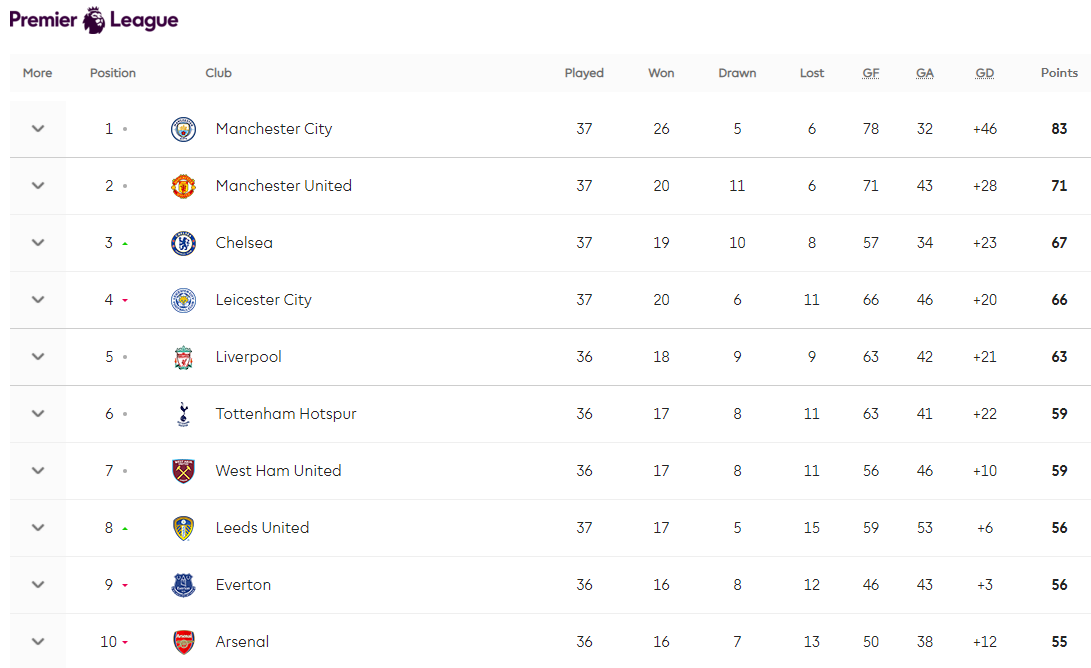

Como pode-se ver , no atual momento restam 3 rodadas para o fim da liga (são 40 rodadas no total) e não há possibilidade do 2° colocado de ultrapassar o Manchester , por isso **ele já é considerado campeão**.

Além da Liga Inglesa , há também a UEFA Champions League , a qual , no momento em que escrevo , **o Manchester City está na final da competição** que será disputada em 29/05/2021 , ou seja , ainda há muitos jogos a serem disputados pela equipe!

*Em virtude de tudo isso , podemos dizer que temos dados "faltantes" ou "incompletos"*. 

## Importando as bibliotecas e lendo os dados:

In [3]:
# bibliotecas de análises
import pandas as pd
import numpy as np
import datetime as dt
from fractions import Fraction

# bibliotecas gráficas
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
#temporada 2019/2020:

## Dados Premier League
df_premier_L_19_20 = pd.read_excel(link_dados_temp_2019_2020 , sheet_name="Dados Premier League")
df_premier_L_19_20["temp"] = "temp_19_20"

## Dados UCL (UEFA Champions League)
df_UCL_19_20 = pd.read_excel(link_dados_temp_2019_2020 , sheet_name="Dados UCL")
df_UCL_19_20["temp"] = "temp_19_20"

In [5]:
#temporada 2020/2021:

## Dados Premier League
df_premier_L_20_21 = pd.read_excel(link_dados_temp_2020_2021 , sheet_name="Dados Premier League")
df_premier_L_20_21["temp"] = "temp_20_21"

## Dados UCL (UEFA Champions League)
df_UCL_20_21 = pd.read_excel(link_dados_temp_2020_2021 , sheet_name="Dados UCL")
df_UCL_20_21["temp"] = "temp_20_21"

In [6]:
# Dados e Estatíticas Físicas:
df_fifa = pd.read_csv(link_dados_jogadores_fifa21)
df_fifa_MCY = df_fifa.query("club_name == 'Manchester City' ")
df_fifa_BEL = df_fifa.query("nationality == 'Belgium' ")
df_KDB = df_fifa.query("long_name == 'Kevin De Bruyne' ")

No conjunto de dados do FIFA 21 há um quantidade gigantesca de características , não iremos trabalhar com todas , apenas com algumas que eu pré-selecionei e julguei serem úteis mediante a posição de De Bruyne no campo (Meio de campo e Meia Central)

In [7]:
estatísticas_buscadas = ["sofifa_id","short_name","height_cm","weight_kg","overall","value_eur","player_positions","international_reputation",
                         "weak_foot" , "skill_moves" , "pace" , "shooting" , "passing" , "dribbling",
                         "defending" , "physic" , "attacking_crossing" , "attacking_finishing" , "attacking_heading_accuracy",
                         "attacking_short_passing" , "attacking_volleys" , "skill_dribbling" ,
                         "skill_curve","skill_fk_accuracy","skill_long_passing" , "skill_ball_control",
                         "movement_acceleration" , "movement_agility" , "movement_reactions",
                         "power_strength" , "power_long_shots" , "mentality_aggression" ,
                         "mentality_interceptions","mentality_vision","defending_standing_tackle",
                         "defending_sliding_tackle"]

### Dando uma olhada em nossos dados:

Antes de fazer quaisquer análises , vale a pena olharmos primeiramente o que temos em nossos conjuntos de dados:

In [8]:
df_premier_L_19_20.head(5)

,Rodada,Data,Time da casa,Time visitante,Placar casa,Placar Fora,Posição,Gols,Assistências,Cartão Amarelo,Entrada,Substituição,Tempo de Jogo,Lesão,Capitão,Jogou,Invensibilidade,temp
0,1,2019-08-10,West Ham United,Manchester City FC,0,5,MO,0.0,1.0,0.0,0',79',79',0,0.0,1,1,temp_19_20
1,2,2019-08-17,Manchester City FC,Tottenham Hotspur,2,2,MO,0.0,2.0,0.0,0',90',90',0,1.0,1,1,temp_19_20
2,3,2019-08-25,AFC Bournemouth,Manchester City FC,1,3,MO,0.0,1.0,0.0,0',90',90',0,0.0,1,1,temp_19_20
3,4,2019-08-31,Manchester City FC,Brighton Albion,4,0,MC,1.0,1.0,0.0,0',69',69',0,0.0,1,1,temp_19_20
4,5,2019-09-14,Norwich City,Manchester City FC,3,2,NaN,0.0,0.0,0.0,57',90',33',0,0.0,1,1,temp_19_20


Como os dados das temporadas de 2019/2020 e 2020/2021 são "iguais" , isso é , possuem as mesmas colunas , não há necessidade de visualizarmos cada um , somente com um dos conjuntos de dados (também chamados de *DataFrames* , termo que irei adotar daqui para frente) podemos tirar alguns breves insights.

O que eu já gostaria de ressaltar é um ponto importante , quase como uma boa prática em Python e com a Biblioteca Pandas , em nossas colunas há um espaçamento nas palavras , isso pode trazer um certo problema , o que irei começar fazendo é remover estes espaços e coloca um "_" no lugar:

In [9]:
def renomeia_colunas(dataframe):
  colunas = []
  for col in list(dataframe.columns):
    colunas.append(col.replace(" ","_"))
  
  return colunas

In [10]:
df_premier_L_19_20.columns = renomeia_colunas(df_premier_L_19_20)
df_UCL_19_20.columns = renomeia_colunas(df_UCL_19_20)

df_premier_L_20_21.columns = renomeia_colunas(df_premier_L_20_21)
df_UCL_20_21.columns = renomeia_colunas(df_UCL_20_21)

Ainda existem mais coisas para serem consertadas mas por hora vamos deixar para depois.

Agora que temos nosso DataFrame "consertado" surge a pergunta: "Ok , mas o que quer dizer ele em sí" , isso é , qual o significado das colunas e os tipos d dados que ele carrega?

Pensando nisso decidi criar uma espécie de dicionário explicando cada uma das variáveis dos dados de competições:

**Dicionário das Colunas**:<br><br>


*   **Rodada** : Número da rodada do jogo
*   **Data** : Data em que o jogo ocorreu
*   **Time_da_casa** : Quem era o time da casa (dono do estádio)
*   **Time_visitante** : Quem era o time visitante
*   **Placar_casa** : Placar do time da casa (gols)
*   **Placar_fora** : Placar do time visitante (gols)
*   **Posição** : Posição em que De Bruyne jogou na partida
*   **Gols** : Número de gols que De Bruyne fez na partida
*   **Assistências** : Número de assistências que De Bruyne fez na partida
*   **Cartão_Amarelo** : Cartões amarelo que De Bruyne tomou na partida
*   **Entrada** : Momento que De Bruyne entro em campo (0 : entrou como titular inial)
*   **Substituição** : Momento em que De Bruyne saiu da partida por substituição (90 : jogou a partida inteira)
*   **Tempo_de_Jogo** : Tempo de Jogo de De Bruyne na partida
*   **Lesão** : Neste jogo De Bruyne estava lesionado ou se lesionou? (0: não | 1: sim)
*   **Capitão** : Neste jogo De Bruyne foi capitão do time? (0: não | 1: sim)
*   **Jogou** : De Bruyne jogou este jogo? (0: não | 1: sim)
*   **Invensibilidade** : Neste jogo o Manchester City ganhou/empatou ou perdeu? (1: ganhou ou empatou | 0: perdeu)
*   **temp** : temporada do momento



Estas são as informações do *Dataframe* das temporadas , não irei especificar as informações dos dados físicos do FIFA 21 visto que são muitas colunas. Na fonte dos dados você pode encontrar um descrição completa : https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn1.dotesports.com%2Fwp-content%2Fuploads%2F2020%2F10%2F01112704%2Ffifa-21-cover.jpg&f=1&nofb=1" width=600>

Vamos partir para as análises!

## Análises:

Antes de analisar os números de De Bruyne nas temporadas passadas , acho importante uma análise física dele, ou seja , como são as estatísticas defesa , ataque , velocidade e outras que eu pré-selecionei.

**Mas quais são os critérios para pré selecionar essas variáveis**? Simples , a posição de De Bruyne em campo , **o Meio de Campo**

**Mas o que o Meio de Campo faz?** Como diria a música do Skank : 


> *O Meio Campo é lugar dos craques que vão levando o time todo pro ataque* 

Existem diversas posições no Meio de Campo, de maneira geral , o meio campista tem o papel de **auxiliar a defesa ao mesmo tempo que cria jogadas para o ataque**. Como se localiza no meio de campo , ele funciona como o **cérebro da equipe** , visualizando oportunidades e as proporcionando para os jogadores do ataque fazerem gols. São normalmente os camisas 10 , **oferecem assistências** para os camisa 9 do time.


<img src="https://upload.wikimedia.org/wikipedia/commons/c/ca/As_tr%C3%AAs_regi%C3%B5es_do_futebol.png" width=300>

### Análises das Estatísticas Físicas entre De Bruyne e o resto do Manchester City e da Seleção Belga:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fst1.latestly.com%2Fwp-content%2Fuploads%2F2019%2F10%2FKevin-De-Bruyne.jpg&f=1&nofb=1" width=600>

#### ***Overrall***

A primeira análise que faremos será a **comparação do "Overrall"** de Kevin De Bruyne:

**Mas o que é "Overrall" ?** No game FIFA 21 Overrall é basicamente uma pontuação média do jogador que varia de 0 a 100. Em uma tradução literal significa algo como "Em geral". Apenas entenda como uma pontuação que o jogador tem , ou seja , quanto maior ela , melhor é o jogador.

In [11]:
# selecionando apenas as varíaveis a serem estudadas
df_fifa_BEL = df_fifa_BEL[estatísticas_buscadas]                   

In [12]:
# indexando as linhas pelo nome dos jogadores
df_fifa_BEL = df_fifa_BEL.set_index(df_fifa_BEL.short_name)

In [13]:
# Retirando a posição "GK" (Goleiro) do Dataframe
df_fifa_BEL = df_fifa_BEL.query("player_positions != 'GK' ") 

In [14]:
# retirando colunas não ultilizadas
df_fifa_BEL = df_fifa_BEL.drop(["sofifa_id","short_name"] , axis=1)

In [15]:
# ordenando o Dataframe e selecionando os top 10 jogadores
df_fifa_BEL = df_fifa_BEL.sort_values('overall' , ascending=False).head(10)

In [16]:
# plotando o gráfico de overrals dos 10 melhores da seleção Belga MENOS OS GOLEIROS:
colors = ['#A4A4A4',] * 10
colors[0] = "#DF013A"

fig = px.bar(df_fifa_BEL , x=df_fifa_BEL.index , y='overall',
             hover_data=['player_positions', 'overall'] , text = df_fifa_BEL['overall'] ,
             color_discrete_sequence = [colors] )

fig.update_layout(title_text='Comparação do Overall de Kevin de Bruyne em relação aos outros jogadores da Seleção Belga')
fig.update_xaxes(title = "")

fig.show()

Na cor vermelha podemos ver as estatísticas de De Bruyne.

Ele é de longe o jogador mais valioso da Belgica neste momento , com um Overrall de **91** , e com certeza um dos maiores do mundo (no site oficial do game ele é o [5° melhor do jogo](https://www.ea.com/pt-br/games/fifa/fifa-21/ratings)) , com uma pontuação extremamente alta!

Mas e quando comparado ao Manchester City , ele se sai bem assim?

In [17]:
# selecionando apenas as varíaveis a serem estudadas
df_fifa_MCY = df_fifa_MCY[estatísticas_buscadas]

In [18]:
# indexando as linhas pelo nome dos jogadores
df_fifa_MCY = df_fifa_MCY.set_index(df_fifa_MCY.short_name)        

In [19]:
# retirando colunas não ultilizadas
df_fifa_MCY = df_fifa_MCY.drop(["sofifa_id","short_name"] , axis=1) 

In [20]:
# Retirando a posição "GK" (Goleiro) do Dataframe
df_fifa_MCY = df_fifa_MCY.query("player_positions != 'GK' ") 

In [21]:
# ordenando os dados e selecionando os top 10 do time
df_fifa_MCY = df_fifa_MCY.sort_values('overall' , ascending=False).head(10)

In [22]:
# plotando o gráfico de overrals dos 10 Jogadores do Manchester City FC MENOS OS GOLEIROS:
colors = ['#A4A4A4',] * 10
colors[0] = "#DF013A"

fig = px.bar(df_fifa_MCY , x=df_fifa_MCY.index , y='overall',
             hover_data=['player_positions', 'overall'] , text = df_fifa_MCY['overall'] ,
             color_discrete_sequence = [colors] )

fig.update_layout(title_text='Comparação do Overall de Kevin De Bruyne em relação aos outros jogadores do Machester City FC')
fig.update_xaxes(title = "")

fig.show()

Novamente ele é o top 1 , dessa vez da seleção Belga!

No quisito Overrall não há dúvidas de que De Bruyne é um dos melhores do mundo e já entrou para a história como um dos maiores Meio Campistas do futebol. Só nesse sentido , qualquer investimento na perpetuação do contrato dele já seria bem vinda a qualquer equipe no mundo.

Apesar do Overral ser a estatística mais comum de visualizarmos alguns atributos dos jogadores, há ainda outros que são chamados de "atributos" , eles se dividem em atributos de ataque , defesa , habilidade, movimento , força e mentalidade . Não entrarei em detalhes sobre cada um , mas podemos analisar eles de forma superficial para vermos como de fato De Bruyne vem se comportando em outros aspectos. 

#### Demais atributos:

##### Jogadores Belgas:

Vamos analisar aqui como De Bruyne vem se comportanto no geral , ele é de fato o top 10 até em outros aspectos? No que ele fica abaixo da média , e da mediana , em qual posição ele fica?

In [23]:
df_KDB = df_KDB[estatísticas_buscadas].set_index("short_name").drop(["sofifa_id","player_positions"] , axis=1)

In [24]:
# Obtendo as médias da pontuação dos atributos de todos os jogadores Belga
df_fifa_BEL_medias = df_fifa_BEL.describe().round(0).T[["mean"]].T

In [25]:
# Obtendo a mediana da pontuação dos atributos de todos os jogadores Belga
df_fifa_BEL_medianas = df_fifa_BEL.describe().round(0).T[["50%"]].T

In [26]:
# Obtendo os top 25% da pontuação dos atributos de todos os jogadores Belga
df_fifa_BEL_75avos = df_fifa_BEL.describe().round(0).T[["75%"]].T

In [27]:
todas_as_colunas = df_fifa_BEL_medias.columns
lista_media = []
lista_mediana = []
lista_75avos = []

for coluna in todas_as_colunas:
  dado_KDB = df_KDB["{}".format(coluna)]
  dado_media = df_fifa_BEL_medias["{}".format(coluna)]
  dado_mediana = df_fifa_BEL_medianas["{}".format(coluna)]
  dado_75avos = df_fifa_BEL_75avos["{}".format(coluna)]


  # lista dos dados das médias
  if int(dado_KDB) >= int(dado_media) :
    lista_media.append("Passou a Média")
  else:
    lista_media.append("Não Passou a Média")

  # lista dos dados das medianas
  if int(dado_KDB) >= int(dado_mediana) :
    lista_mediana.append("Passou a Mediana")
  else:
    lista_mediana.append("Não Passou a Mediana")

  # lista dos dados 75 avos:
  if int(dado_KDB) >= int(dado_75avos) :
    lista_75avos.append("Passou os 75%")
  else:
    lista_75avos.append("Não Passou os 75%")

In [28]:
lista_media_valores = [lista_media.count('Não Passou a Média') , lista_media.count('Passou a Média')]
lista_mediana_valores = [lista_mediana.count('Não Passou a Mediana') , lista_mediana.count('Passou a Mediana')]
lista_75avos_valores = [lista_75avos.count('Não Passou os 75%') , lista_75avos.count('Passou os 75%')]

In [29]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Bar(x=["Não Passou a Média" , "Passou a Média"], y=lista_media_valores , 
           text = lista_media_valores , textposition='auto'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=["Não Passou a Mediana" , "Passou a Mediana" ], y=lista_mediana_valores , 
           text = lista_mediana_valores , textposition='auto'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=["Não Passou os 75%","Passou os 75%"], y=lista_75avos_valores , 
           text = lista_75avos_valores , textposition='auto'),
    row=1, col=3
)

fig.update_layout(title_text="Comparação das Estatísticas de Kevin De Bruyne comparado aos jogadores Belgas")
fig.show()

Neste gráfico podemos ver para quantos atributos De Bruyne foi superior a média , a mediana e aos top 25% jogadores da Belgica.

No primeiro gráfico podemos identificar que **De Bruyne ficou superior em 30 atributo e inferior apenas em 3** na pontuação de média geral.

No segundo gráfico observamos o mesmo comportamento que o primeiro , **superior a 50% dos jogadores Belgas em 33 atributos e inferior em apenas 3**

No terceiro gráfico vemos algo interessante , **dos 25% melhores jogadores da Belgica , De Bruye é superior em 20 atributos e inferior em 13** , o que não é algo ruim , uma diferença de 7 atributos!

**Mas quais são esses atributos?** É isso que vamos ver agora!

In [30]:
df_medias = pd.DataFrame(lista_media).T
df_medias.columns = todas_as_colunas

df_medianas = pd.DataFrame(lista_mediana).T
df_medianas.columns = todas_as_colunas

df_75_avos = pd.DataFrame(lista_75avos).T
df_75_avos.columns = todas_as_colunas

In [31]:
print("Para os valores superiores a Média , De Bruyne foi inferior nos aspectos:")

for coluna in todas_as_colunas:
  variavel = df_medias["{}".format(coluna)][0]
  if variavel == 'Não Passou a Média':
    print("*" , coluna)

Para os valores superiores a Média , De Bruyne foi inferior nos aspectos:
* weight_kg
* attacking_heading_accuracy
* defending_sliding_tackle


No quisito de **média** , De Bruyne foi inferior no **peso** (weight_kg) , **cabeceio de bola** (attacking_heading_accuracy) e **carrinho** (defending_sliding_tackle)

In [32]:
print("Para os valores superiores a Mediana , De Bruyne foi inferior nos aspectos:")

for coluna in todas_as_colunas:
  variavel = df_medianas["{}".format(coluna)][0]
  if variavel == 'Não Passou a Mediana':
    print("*" , coluna)

Para os valores superiores a Mediana , De Bruyne foi inferior nos aspectos:
* weight_kg
* pace
* attacking_heading_accuracy


No quisito mediana (isso é , o valor que divide os atributos de 50% dos jogadores) , De Bruyne foi inferior novemente no **peso** (weight_kg) - o que não necessariamente é algo ruim , dependendo das circunstancias pode ser bom para ele -, **ritmo ou comumente chamado de pique de jogo** (pace) e **cabeceio de bola** (attacking_heading_accuracy)

In [33]:
print("Para os valores superiores aos 25% melhores da Seleção , De Bruyne foi inferior nos aspectos")

for coluna in todas_as_colunas:
  variavel = df_75_avos["{}".format(coluna)][0]
  if variavel == 'Não Passou os 75%':
    print("*" , coluna)

Para os valores superiores aos 25% melhores da Seleção , De Bruyne foi inferior nos aspectos
* height_cm
* weight_kg
* pace
* defending
* physic
* attacking_heading_accuracy
* movement_acceleration
* movement_agility
* power_strength
* mentality_aggression
* mentality_interceptions
* defending_standing_tackle
* defending_sliding_tackle


Se separarmos os 25% melhores jogadores da Belgica , temos que De Bruyne foi inferior nos seguintes atributos:

* **Altura** - height_cm
* **Peso** - weight_kg
* **Ritmo ou Pique de jogo** - pace
* **Defesa** - defending
* **Físico** - physic
* **Cabeceio de bola** - attacking_heading_accuracy
* **Aceleração de movimento** - movement_acceleration
* **Agilidade de movimento** - movement_agility
* **Força de chute** - power_strength
* **Visão de jogo para o ataque** - mentality_aggression
* **Visão de Jogo para a defesa** - mentality_interceptions
* **Marcação/Roubada de bola** - defending_standing_tackle
* **Carrinho** - defending_sliding_tackle

Pode parecer muito , e é, entretanto , estamos fazendo comparações gerais , por exemplo , estamos comparando a pontuação de marcação?roubada de bola dele com a de um zagueiro , que por natureza trabalha na defesa . Ou ainda , estamos comparado a aceleração e o ritmo dele com o de um atacante ou centro-avante , dada a posição dele , é óbvio que ele perderia em alguns desses atributos.

Mas pensando por outro lado , ele ainda é melhor que 50% dos jogadores belgas que atuam na defesa ou no ataque. Ainda é melhor em outros 20 atributos técnicos quando comparado ao top 25% dos jogadores belgas!

##### Jogadores do Manchester City:

In [34]:
df_fifa_MCY_medias = df_fifa_MCY.describe().round(0).T[["mean"]].T
df_fifa_MCY_medianas = df_fifa_MCY.describe().round(0).T[["50%"]].T
df_fifa_MCY_75avos = df_fifa_MCY.describe().round(0).T[["75%"]].T

In [35]:
todas_as_colunas = df_fifa_MCY_medias.columns
lista_media = []
lista_mediana = []
lista_75avos = []

for coluna in todas_as_colunas:
  dado_KDB = df_KDB["{}".format(coluna)]
  dado_media = df_fifa_MCY_medias["{}".format(coluna)]
  dado_mediana = df_fifa_MCY_medianas["{}".format(coluna)]
  dado_75avos = df_fifa_MCY_75avos["{}".format(coluna)]


  # lista dos dados das médias
  if int(dado_KDB) >= int(dado_media) :
    lista_media.append("Passou a Média")
  else:
    lista_media.append("Não Passou a Média")

  # lista dos dados das medianas
  if int(dado_KDB) >= int(dado_mediana) :
    lista_mediana.append("Passou a Mediana")
  else:
    lista_mediana.append("Não Passou a Mediana")

  # lista dos dados 75 avos:
  if int(dado_KDB) >= int(dado_75avos) :
    lista_75avos.append("Passou os 75%")
  else:
    lista_75avos.append("Não Passou os 75%")

In [36]:
lista_media_valores = [lista_media.count('Não Passou a Média') , lista_media.count('Passou a Média')]
lista_mediana_valores = [lista_mediana.count('Não Passou a Mediana') , lista_mediana.count('Passou a Mediana')]
lista_75avos_valores = [lista_75avos.count('Não Passou os 75%') , lista_75avos.count('Passou os 75%')]

In [37]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Bar(x=["Não Passou a Média" , "Passou a Média"], y=lista_media_valores , 
           text = lista_media_valores , textposition='auto'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=["Não Passou a Mediana" , "Passou a Mediana" ], y=lista_mediana_valores , 
           text = lista_mediana_valores , textposition='auto'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=["Não Passou os 75%","Passou os 75%"], y=lista_75avos_valores , 
           text = lista_75avos_valores , textposition='auto'),
    row=1, col=3
)

fig.update_layout(title_text="Comparação das Estatísticas de Kevin De Bruyne comprado ao Manchester City FC")
fig.show()

Aqui já temos um cenário diferente. O Manchester City é um grande club , com muito jogadores muito bons , neste caso podemos ter um De Bruyne que não necessariament domina em tudo.

Além do mais , o número de jogadores do plantel deles é menor quando comparado a totalidade de jogadores Belgas

No primeiro gráfico temos que De Bruyne foi **Superior a média dos jogadores em  27 aspectos e infeior em 6**.

No segundo gráfico temos um resultado melhor , **superior a mediana (os top 50% melhores jogadores da Belgica) cerca de 29 atributos e inferior 4**.

Já no ultimo gráfico temos um certo equilíbrio , considerando os 25% melhores jogadores do Machester City , **De Bruyne é superior em 17 atributos físicos e infeior em 16**.

Mas quais são esses atributos ?

In [38]:
df_medias = pd.DataFrame(lista_media).T
df_medias.columns = todas_as_colunas

df_medianas = pd.DataFrame(lista_mediana).T
df_medianas.columns = todas_as_colunas

df_75_avos = pd.DataFrame(lista_75avos).T
df_75_avos.columns = todas_as_colunas

In [39]:
print("Para os valores superiores a Média , De Bruyne foi inferior nos aspectos:")

for coluna in todas_as_colunas:
  variavel = df_medias["{}".format(coluna)][0]
  if variavel == 'Não Passou a Média':
    print("*" , coluna)

Para os valores superiores a Média , De Bruyne foi inferior nos aspectos:
* weight_kg
* pace
* attacking_heading_accuracy
* movement_acceleration
* movement_agility
* defending_sliding_tackle


No quisito de média , De Bruyne foi inferior nos seguintes aspectos:



*   **Peso** - weight_kg
*   **Ritmo ou Pique de jogo** - pace
*   **Cabeceio de bola** - attacking_heading_accuracy
*   **Aceleração de movimento** - movement_acceleration
*   **Agilidade de movimento** - movement_agility
*   **Carrinho** - defending_sliding_tackle


In [40]:
print("Para os valores superiores a Mediana , De Bruyne foi inferior nos aspectos:")

for coluna in todas_as_colunas:
  variavel = df_medianas["{}".format(coluna)][0]
  if variavel == 'Não Passou a Mediana':
    print("*" , coluna)

Para os valores superiores a Mediana , De Bruyne foi inferior nos aspectos:
* pace
* attacking_heading_accuracy
* movement_acceleration
* movement_agility


Quando se trata dos 50% melhores jogadores do time , esse númerio de "inferiores" diminui , ele é somente inferior nos seguintes atributos:

*   **Ritmo ou Pique de jogo** - pace
*   **Cabeeceio de bola** - attacking_heading_accuracy
*   **Aceleração de movimento** - movement_acceleration 
*   **Agilidade de movimento** - movement_agility



In [41]:
print("Para os valores superiores aos 25% melhores da equipe , De Bruyne foi inferior nos aspectos")

for coluna in todas_as_colunas:
  variavel = df_75_avos["{}".format(coluna)][0]
  if variavel == 'Não Passou os 75%':
    print("*" , coluna)

Para os valores superiores aos 25% melhores da equipe , De Bruyne foi inferior nos aspectos
* height_cm
* weight_kg
* pace
* dribbling
* defending
* physic
* attacking_finishing
* attacking_heading_accuracy
* skill_dribbling
* movement_acceleration
* movement_agility
* power_strength
* mentality_aggression
* mentality_interceptions
* defending_standing_tackle
* defending_sliding_tackle


Quando se trata de comparar os atributos dos 25% melhores jogadores do time , De Bruyne foi inferior nos seguintes aspectos:



*   **Altura** - height_cm
*   **Peso** - weight_kg
*   **Ritmo ou Pique de jogo** - pace
*   **Drible** - dribbling
*   **Defesa** - defending
*   **Físico** - physic
*   **Finalização** - attacking_finishing
*   **Cabeceio de bola** - attacking_heading_accuracy
*   **Habilidade em dribles** - skill_dribbling
*   **Aceleração de movimento** - movement_acceleration
*   **Agilidade de movimento** - movement_agility
*   **Força** - power_strength
*   **Visão de jogo para o ataque** - mentality_aggression
*   **Visão de jogo para inteceptações** - mentality_interceptions
*   **Marcação/Roubada de bola** - defending_standing_tackle
*   **Carrinho** - defending_sliding_tackle



Dessa vez podemos ver que De Bruyne ficou abaixo em uma proporção maior do que comparado aos jogadores Belgas , isso se dá pelo fato de o Manchester City ser hoje um dos melhores clubs do mundo , logo a disputa das habilidades dos jogadores são muito "acirrada".

Entretanto , ele ainda vai bem se analisarmos bem . Para um jogador de tantas responsabilidades em campo ele ainda se sobressai em muitos aspectos. Ele definitivamente não é o melhor jogador para marcação , isso por que não é a função dele principal em campo, mas só dele se colocar acima de 50% do time já é algo interessante.

O fato é que Kevin De Bruyne é um cara multi-tarefas , capaz de trabalhar bem com o time e com características peculiares , sendo bem colocado em campo ele exerce muitas tarefas de forma regular e arma bem o jogo , aquele que vê o campo por completo e define cada tomada de decisão da equipe e orienta o time.

#### Quanta Diferença faz De Bruyne no Manchester City:

Agora que sabemos os motivos de De Bruyne ser um dos Melhores jogadores no FIFA 21 e o quão superior é ele em alguns aspectos , chegou a hora de analisar suas temporadas , afinal , **de nada adianta um jogador ser bom mas não ajudar a equipe, certo?**

Aqui serão analisadas algumas estatísticas dele nas temporadas 2019/2020 e 2020/2021 , para que seja mais fácil o entendimento e fique mais organizado nosso Notebook Colaboratory irei dividir essa área por campeonato , ou seja , dedicarei uma parcela a analises do papel dele na Premier League e outra a UEFA Champions League (UCL)

Vamos começar com a Premier League

##### Premier League:

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fen%2Fthumb%2Ff%2Ff2%2FPremier_League_Logo.svg%2F1200px-Premier_League_Logo.svg.png&f=1&nofb=1" width=600>

###### **Geral**

Vamos começar com algumas análises gerais da temporada , sem nos aprofundarmos muito

In [42]:
df_premier_completa = pd.concat([df_premier_L_19_20 , df_premier_L_20_21] , axis = 0)

In [43]:
# consertando o português da coluna
df_premier_completa = df_premier_completa.rename(columns = {'Invensibilidade':'invencibilidade'})

In [44]:
# convertendo as colunas de tempo para valores inteiros
df_premier_completa["Tempo_de_Jogo"] = df_premier_completa["Tempo_de_Jogo"].str.replace("'","").fillna(0).astype(int)
df_premier_completa["Entrada"] = df_premier_completa["Entrada"].str.replace("'","").fillna(0).astype(int)
df_premier_completa["Substituição"] = df_premier_completa["Substituição"].str.replace("'","").fillna(0).astype(int)

In [45]:
# algumas estatísticas gerais (minutos e partidas jogadas)
minutos_jogados = df_premier_completa.query("Jogou == 1")["Tempo_de_Jogo"].sum()
numero_de_rodadas = df_premier_completa.query("Jogou == 1")[["Rodada"]].shape[0]

print("Durante todas as {} rodadas que ele jogou , De Bruyne ficou um total de {} minutos em campo , o que dá em médias {} minutos por partida!".format(numero_de_rodadas , 
                                                                                                                                 minutos_jogados,
                                                                                                                                 round(minutos_jogados/numero_de_rodadas) ))

print("Ou seja , imaginando que um jogo tenha 90 minutos (padrão , fora os acréscimos) , Kevin De Bruyne jogou pouco mais de 88% dentro de campo em partidas da Premier League entre 2019 e 2021")

Durante todas as 59 rodadas que ele jogou , De Bruyne ficou um total de 4711 minutos em campo , o que dá em médias 80 minutos por partida!
Ou seja , imaginando que um jogo tenha 90 minutos (padrão , fora os acréscimos) , Kevin De Bruyne jogou pouco mais de 88% dentro de campo em partidas da Premier League entre 2019 e 2021


De Bruyne jogou bastante pela Premier League , chegando a uma média de 80 minutos por partida

Vendo de maneira geral é isso que temos , mas e para as diferentes temporadas? Ele jogou mais nos recentees jogos ou não?

In [46]:
# estatísticas básicas da temporada 2019/2020 (minutos e partidas jogadas)
minutos_jogados_19_20 = df_premier_completa.query("Jogou == 1 and temp == 'temp_19_20'")["Tempo_de_Jogo"].sum()
numero_de_rodadas_19_20 = df_premier_completa.query("Jogou == 1 and temp == 'temp_19_20'")[["Rodada"]].shape[0]

print("Na temporada 2019/2020 , De Bruyne jogou um total de {} rodadas e {} minutos , o que dá em média {} minutos por partida".format(numero_de_rodadas_19_20,
                                                                                                                                       minutos_jogados_19_20,
                                                                                                                                       round(minutos_jogados_19_20/numero_de_rodadas_19_20)))

Na temporada 2019/2020 , De Bruyne jogou um total de 35 rodadas e 2800 minutos , o que dá em média 80 minutos por partida


In [47]:
# estatísticas básicas da temporada 2020/2021 (minutos e partidas jogadas)
minutos_jogados_20_21 = df_premier_completa.query("Jogou == 1 and temp == 'temp_20_21'")["Tempo_de_Jogo"].sum()
numero_de_rodadas_20_21 = df_premier_completa.query("Jogou == 1 and temp == 'temp_20_21'")[["Rodada"]].shape[0]

print("Na temporada 2020/2021 , De Bruyne jogou um total de {} rodadas e {} minutos , o que dá em média {} minutos por partida".format(numero_de_rodadas_20_21,
                                                                                                                                       minutos_jogados_20_21,
                                                                                                                                       round(minutos_jogados_20_21/numero_de_rodadas_20_21)))

Na temporada 2020/2021 , De Bruyne jogou um total de 24 rodadas e 1911 minutos , o que dá em média 80 minutos por partida


Ao que tudo indica , a média de tempo para ambas as temporadas foi a mesma , ele jogou uma média de 80 minutos pela Premier League tanto na temporada 2019/2020 quanto na temporada 2020/2021

Sabemos o tempo médio , mas será que ele de fato jogou muito? Quantas partidas ele teve no fim, jogou muitas rodadas?

In [48]:
# número de rodadas das temporadas
numero_de_rodadas_20_21_totais = df_premier_completa.query("temp == 'temp_20_21'")[["Rodada"]].shape[0]
numero_de_rodadas_19_20_totais = df_premier_completa.query("temp == 'temp_19_20'")[["Rodada"]].shape[0]

In [49]:
# vezes que De Bruyne Jogou e não jogou na Premier League para ambas as temporadas
valores_20_21 = [numero_de_rodadas_20_21_totais - numero_de_rodadas_20_21 , numero_de_rodadas_20_21]
labels_ = ["Não Jogou","Jogou"]

valores_19_20 = [numero_de_rodadas_19_20_totais - numero_de_rodadas_19_20 , numero_de_rodadas_19_20]

In [50]:
cores = ["#FAAC58","#D8D8D8"]

In [51]:
# plotando o gráfico de "rosca"
fig = px.pie(values=valores_19_20 , names=labels_ , color_discrete_sequence=cores , hole=.4)
# adicionando o número de rodadas no gráfico
fig.update_traces(textinfo='value', textfont_size=20)
# Adicionando título
fig.update_layout(title_text="Quantidade de Jogos pela Premier League na temporada 2019/2020" ,
                  font=dict(size=15)
                )
fig.show()

De Bruyne , na temporada 2019/2020 jogou 35 das 38 rodadas possíveis (isso desconsiderando aquelas as quais ele não participou por estar na seleção) , o que coloca ele em uma posição de titular basicmanete absoluto no time!

In [52]:
# plotando o gráfico de "rosca"
fig = px.pie(values=valores_20_21 , names=labels_ , color_discrete_sequence=cores ,  hole=.4)
# adicionando o número de rodadas no gráfico
fig.update_traces(textinfo='value', textfont_size=20)
# Adicionando título
fig.update_layout(title_text="Quantidade de Jogos pela Premier League na temporada 2020/2021" ,
                  font=dict(size=15))
fig.show()

Já para a temporada 2020/2021 temos algo diferente , no momento em que escrevo estamos na rodada 38 . **Das 35 rodadas possíveis de serem jogadas ele jogou apenas 24! Mas por que?** Nesta última temporada De Bruyne passou por diversas lesões , o que comprometeu a participação dele na liga , além disso , o investimento do Manchester City na UEFA Champions League nesta temporada foi maior , fazendo muitos dos jogadores do plantel principal serem "preservados" para partidas da UCL.

###### **Assistências** 

Como já dito acima , De Bruyne é uma meio de campo , ou seja , o papel dele é ser o cérebro da equipe , aquele que arma as jogadas! Mas será que ele vem exercendo bem esse papel?

In [53]:
# preenchendo dados "NaN" por 0
df_premier_completa = df_premier_completa.fillna(0)

#selecioanndo as estatísticas a serem analisadas
dados_stat = df_premier_completa[["Gols","Assistências","Cartão_Amarelo","Jogou"]].sum()

# guardando os dados em variáveis
gols = dados_stat[0]
assist = dados_stat[1]
cartao_amar = dados_stat[2]
jogos = dados_stat[3]

In [54]:
print("Durante as Temporadas de 2019/2020 e 2020/2021 ele marcou um total de {} gols , {} assistências e {} cartões amarelos em {} jogos".format(gols , assist , cartao_amar , jogos))

Durante as Temporadas de 2019/2020 e 2020/2021 ele marcou um total de 18.0 gols , 31.0 assistências e 4.0 cartões amarelos em 59.0 jogos


In [55]:
gols_p_partida = round(gols/jogos , 2)
assist_p_partida = round(assist/jogos , 2)

In [56]:
print("Se analisarmos o contexto geral , temos poucos gols , aproximadamente {} por partida , mas no quisito assistências temos algo interessante , {} por partida".format(
    gols_p_partida , assist_p_partida
))

Se analisarmos o contexto geral , temos poucos gols , aproximadamente 0.31 por partida , mas no quisito assistências temos algo interessante , 0.53 por partida


Por uma análise geral , ele de fato tem poucos gols , algo que não é papel dele na equipe! entretando ele tem um número relativamente alto de assistências , 31 no total , para 59 rodadas jogadas! Para um meio de campo são números interessantes , cerca de 1 assistência a cada 2 jogos!

Mesmo no quisito gols , ele tem menos , entretanto é um número até bom se analisarmos bem , 0.31 gols por partida , a cada 10 jogos , temos 3 gols do De Bruyne!

Vamos além agora , eu gostaria de analisar a diferença que De Bruyne faz para a equipe em campo, principalmente como capitão

###### **Capitania e o desempenho geral do time** 

Vamos começar visualizando quantas vezes De Bruyne foi capitão entre 2019 e 2021:

In [57]:
values_19_20 = df_premier_completa.query("temp == 'temp_19_20' and Capitão == 1").shape[0]
values_20_21 = df_premier_completa.query("temp == 'temp_20_21' and Capitão == 1").shape[0]

labels = ["Capitania na temporada 2019/2020" , "Capitania na temporada 2020/2021"]

In [58]:
fig = px.bar(x=labels , y=[values_19_20 , values_20_21] , width=700 , text=[values_19_20 , values_20_21] , color_discrete_sequence=["#3ECC5F"])
fig.update_layout(title_text='Vazes que De Bruyne foi capitão entre 2019-2021 na Premier League')
fig.update_xaxes(title = "")
fig.update_yaxes(title = "Número de jogos")
fig.show()

Só na temporada 2020/2021 De Bruyne foi capitão 14 vezes na Premier League , contra apenas 4 na temporada passada!

A partir da temporada 2020/2021 Kevin De Bruyne ganhou a capitania oficial do time , sendo escalada em muitas partidas como capitão. Mas isso de fato afeta em algo no time? O capitão desempenha um papel importante na equipe , ele deve ser um lider nato em campo que coordena o time!

In [59]:
# dataframe com os dados onde ele é o capitão:
df_capitania = df_premier_completa.query("Capitão == 1")

In [60]:
# estatísticas
gols = int(df_capitania.Gols.sum())
assist = int(df_capitania.Assistências.sum())
tempo_de_jogo_medio = int(round(df_capitania["Tempo_de_Jogo"].mean() , 0))
invencibilidade = int(df_capitania.invencibilidade.sum())
partidas = int(df_capitania.shape[0])

In [61]:
print("Durante a Premier League (como capitão) , tanto na temporada 2019/2020 quanto na 2020/2021 , De Bruyne teve:")
print("* {} Gols".format(gols))
print("* {} Assistências".format(assist))
print("* Jogou em médias {} minutos".format(tempo_de_jogo_medio))
print("* O time ganhou ou empatou {} jogos em um total de {} rodadas".format(invencibilidade , partidas))

Durante a Premier League (como capitão) , tanto na temporada 2019/2020 quanto na 2020/2021 , De Bruyne teve:
* 3 Gols
* 12 Assistências
* Jogou em médias 87 minutos
* O time ganhou ou empatou 16 jogos em um total de 18 rodadas


O desempenho de De Bruyne como capitão é de fato interessante , apenas 3 gols entretanto um total de 12 assistências em 16 partidas de invencibilidade! (ganhar ou empatar um jogo) . Basicamente enquanto capitão o Manchester City teve apenas 2 derrotas! 

Mas vamos mais além em nossas comparações , o quão decisivo é ele na equipe de fato?

In [62]:
# vamos guardar a quantidade de gols em uma variável

gols_na_capitania = df_capitania.query("invencibilidade == 1")

# gols que o MANC fez tanto em casa , quanto fora
gols_casa = gols_na_capitania.query("Time_da_casa == 'Manchester City FC' ").Placar_casa.sum()
gols_fora = gols_na_capitania.query("Time_visitante == 'Manchester City FC' ").Placar_Fora.sum()

# todos os gols feitos pelo MANC enquanto De Bruyne era capitão:
gols_na_capitania = gols_casa + gols_fora

In [63]:
assists_por_gol = Fraction(assist , gols_na_capitania)
list_assists_por_partida = str(assists_por_gol).split("/")

invencibilidade_por_partida = Fraction(invencibilidade , partidas)
list_invencibilidade_por_partida = str(invencibilidade_por_partida).split("/")

In [64]:
# percentual de assistências por gols totais do MANC enquanto De Bruyne era capitão
percent_assist = round((assist/gols_na_capitania)*100 , 2)

# percentual de vitórias ou empates com relação aos jogos onde De Bruyne era capitão
percent_invenc = round((invencibilidade/partidas)*100 , 2)

In [65]:
print("Em vitórias ou empates onde De Bruyne foi capitão:")
print("A cada {} gols , De Bruyne participa diretamente da criação de {} deles! ou seja, {}% \n".format(list_assists_por_partida[1] , 
                                                                                                        list_assists_por_partida[0] ,
                                                                                                        percent_assist ))

print("A Cada {} partidas onde De Bruyne é capitão , em {} delas o time sai com a vitória ou com o empate! ou seja, {}%".format(list_invencibilidade_por_partida[1],
                                                                                                                               list_invencibilidade_por_partida[0] ,
                                                                                                                               percent_invenc ))

Em vitórias ou empates onde De Bruyne foi capitão:
A cada 13 gols , De Bruyne participa diretamente da criação de 4 deles! ou seja, 30.77% 

A Cada 9 partidas onde De Bruyne é capitão , em 8 delas o time sai com a vitória ou com o empate! ou seja, 88.89%


A proporçaõ de participações **DIRETAS** em jogadas que resultaram em gols pelo Manchester City é de incríveis 30% ! Para um meia de campo são surreais esses dados ! a cada 13 gols ele dá assistências diretas , imagine então quantas assistências indiretas ele ainda não tem pela equipe? 

Fora isso a proporção de vitória da equipe dele enquanto ele é capitão é igualmente alta , 88% de aproveitamento! Com toda certeza a influência dele em campo é grande!

Evidente que esses dados podem ser contestados , certo? Sim! tudo pode ser uma simples coincidência , para isso basta analisarmos como a equipe se sai sem ele na capitania.

###### **Fora da Capitania e o desempenho geral do time** 

Para esta situação vamos considerar os jogos onde ele não foi capitão independente de ter jogado ou não.

In [66]:
# conjunto de dados onde ele não é capitão
df_sem_capitania = df_premier_completa.query("Capitão == 0")

In [67]:
# estatísticas:
gols = int(df_sem_capitania.Gols.sum())
assist = int(df_sem_capitania.Assistências.sum())
tempo_de_jogo_medio = int(round(df_sem_capitania["Tempo_de_Jogo"].mean() , 0))
tempo_de_jogo_medio_real = int(round(df_sem_capitania.query("Jogou == 1")["Tempo_de_Jogo"].mean() , 0)) 
invencibilidade = int(df_sem_capitania.invencibilidade.sum())
partidas = int(df_sem_capitania.shape[0])

In [68]:
print("Durante a Premier League , quanddo De Bruyne não é capitão , ele tem as seguintes estatísticas:")
print("* {} Gols".format(gols))
print("* {} Assistências".format(assist))
print("* Jogou em média {} minutos , considerando apenas os jogos que ele jogou , temos {} minutos".format(tempo_de_jogo_medio , tempo_de_jogo_medio_real))
print("* O time ganhou ou empatou {} jogos em um total de {} rodadas".format(invencibilidade , partidas))

Durante a Premier League , quanddo De Bruyne não é capitão , ele tem as seguintes estatísticas:
* 15 Gols
* 19 Assistências
* Jogou em média 57 minutos , considerando apenas os jogos que ele jogou , temos 77 minutos
* O time ganhou ou empatou 46 jogos em um total de 55 rodadas


Para quando ele não é capitão , ele faz mais gols e mais assistências , apesar disso são mais rodadas. Mas o que isso quer dizer?

In [69]:
# dataframe onde de bruyne não era capitão
df_fora_da_capitania = df_premier_completa.query("Capitão == 0")

In [70]:
# numero de partidas onde ele não era capitão
num_partidas_fora_da_capita = df_fora_da_capitania.shape[0]

In [71]:
# guardar os dados de gols em uma variável
gols_fora_capitania = df_fora_da_capitania.query("invencibilidade == 1")

# pegando os gols fora e dentro de casa e separando
gols_casa = gols_fora_capitania.query("Time_da_casa == 'Manchester City FC' ").Placar_casa.sum()
gols_fora = gols_fora_capitania.query("Time_visitante == 'Manchester City FC' ").Placar_Fora.sum()

# variável que guarda a quantidade de gols que o MANC fez enquanto De Bruyne não era capitão
gols_fora_capitania = gols_casa + gols_fora

In [72]:
# Assietências feitas por De Bruyne pelo número de gols da equipe enquanto ele NÃO ERA CAPITÃO
assists_por_gols = Fraction(assist , gols_fora_capitania)
list_assists_por_gols = str(assists_por_gols).split("/")

# Jogos vencidos ou empatadas enquanto De Bruyne não era capitão da equipe
invencibilidade_por_partida = Fraction(invencibilidade , partidas)
list_invencibilidade_por_partida = str(invencibilidade_por_partida).split("/")

In [73]:
# percentual de assistências por gols totais do MANC enquanto De Bruyne NÃO ERA CAPITÃO
percent_assist = round((assist/gols_fora_capitania)*100 , 2)

# percentual de jogos vencidos ou empatados em relação ao total de partidas enquanto De Bruyne NÃO ERA CAPITÃO
percent_invenc = round((invencibilidade/num_partidas_fora_da_capita)*100 , 2)

In [74]:
print("Em vitórias ou empates onde ele NÃO foi capitão:")
print("A cada {} gols , De Bruyne participa diretamente da criação de {} deles! Ou seja {}% \n".format(list_assists_por_gols[1] , 
                                                                                                       list_assists_por_gols[0] ,
                                                                                                       percent_assist))

print("A Cada {} partidas onde De Bruyne não é capitão , em {} delas o time sai com a vitória ou com o empate! Ou seja {}%".format(list_invencibilidade_por_partida[1],
                                                                                                                              list_invencibilidade_por_partida[0] ,
                                                                                                                              percent_invenc))

Em vitórias ou empates onde ele NÃO foi capitão:
A cada 129 gols , De Bruyne participa diretamente da criação de 19 deles! Ou seja 14.73% 

A Cada 55 partidas onde De Bruyne não é capitão , em 46 delas o time sai com a vitória ou com o empate! Ou seja 83.64%


Diferentemente dos dados da capitania , ao que tudo indica o desempenho de De Bruyne cai quando não é capitão , faz menos gols e menos assistências(quando comparado ao número de partidas) , tem queda de quase 16% em criação de jogadas que resultaram em gols e apesar do aproveitamento do time ainda ser alta , cerca de 83% de vitórias ou derrotas , ainda é menor em comparação com o fato de ser capitão

###### **Conclusões** 

A taxa de vitória do time com De Bruyne como Capitão da equipe ainda é maior (mesmo que por uma diferença pequena) do que se ele não a tivesse. **ENTRETANTO** no momento em que fiz este artigo apesar do Manchester City já ter sido campeão , ainda restam 3 rodadas para o fim da Liga , ou seja , podemos ter melhoras nessas estatísticas, principalmente no momento em que escrevi isso , visto que o time ainda se prepara para terminar a liga e para disputar a final da UCL

Mas algo muito pertinente é diferença de assistências que De Bruyne tem . Como capitão ele parece poder ajudar mais o time , dando mais jogadas e passe do que se ele não o fosse! uma diferença de quase 15 pontos percentuais , ao que tudo indica , entre uma temporada e outra ele não só melhorou como também ao ser capitão parece ter mais liberdade na atuação em campo , principalmente em criação de jogadas.

Talvez tê-lo como capitão melhora o próprio desempenho e até de certa forma o desempenho do time.

Fora que os dados coletados ainda não estão completos , visto que a temporada não acabou

##### UEFA Champions League (UCL):

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FltcHzgUc944%2Fmaxresdefault.jpg&f=1&nofb=1" width=600>

###### **Geral**

Assim como feito anteriormente , vamos começar com algumas análises gerais do papel de De Bruyne na UEFA Champions League (UCL)

In [75]:
# juntando os dados da UCL tanto da temporada 2019/2020 quanto da temporada 2020/2021
df_ucl_completa = pd.concat([df_UCL_19_20 , df_UCL_20_21] , axis = 0)

In [76]:
# consertando o português da coluna
df_ucl_completa = df_ucl_completa.rename(columns = {'Invensibilidade':'invencibilidade'})

In [77]:
# convertendo as colunas de tempo para valores inteiros
df_ucl_completa["Tempo_de_Jogo"] = df_ucl_completa["Tempo_de_Jogo"].str.replace("'","").fillna(0).astype(int)
df_ucl_completa["Entrada"] = df_ucl_completa["Entrada"].str.replace("'","").fillna(0).astype(int)
df_ucl_completa["Substituição"] = df_ucl_completa["Substituição"].str.replace("'","").fillna(0).astype(int)

In [78]:
# algumas estatísticas gerais (minutos e partidas jogadas) UCL
minutos_jogados = df_ucl_completa.query("Jogou == 1")["Tempo_de_Jogo"].sum()
numero_de_rodadas = df_ucl_completa.query("Jogou == 1")[["Rodada"]].shape[0]

print("Durante todas as {} rodadas que ele jogou na UEFA Champions League , De Bruyne ficou um total de {} minutos em campo , o que dá em médias {} minutos por partida!".format(numero_de_rodadas , 
                                                                                                                                                                                  minutos_jogados,
                                                                                                                                                                                  round(minutos_jogados/numero_de_rodadas) ))

print("Ou seja , imaginando que um jogo tenha 90 minutos (padrão , fora os acréscimos) , Kevin De Bruyne jogou pouco mais de 94% dentro de campo em partidas da UEFA Champions League entre 2019 e 2021")

Durante todas as 14 rodadas que ele jogou na UEFA Champions League , De Bruyne ficou um total de 1183 minutos em campo , o que dá em médias 84 minutos por partida!
Ou seja , imaginando que um jogo tenha 90 minutos (padrão , fora os acréscimos) , Kevin De Bruyne jogou pouco mais de 94% dentro de campo em partidas da UEFA Champions League entre 2019 e 2021


Na UCL , De Bruyne jogou um total de 14 rodadas , tendo uma média de 84 minutos de jogo por partida. Em sumo ,De Bruyne jogou pouco mais de 94% do tempo de uma partida.

Mas e para as diferentes temporadas da UEFA Champions League? Será que o padrão se repete?

In [79]:
# estatísticas básicas da temporada 2019/2020 (minutos e partidas jogadas) UCL
minutos_jogados_19_20 = df_ucl_completa.query("Jogou == 1 and temp == 'temp_19_20'")["Tempo_de_Jogo"].sum()
numero_de_rodadas_19_20 = df_ucl_completa.query("Jogou == 1 and temp == 'temp_19_20'")[["Rodada"]].shape[0]

print("Na temporada 2019/2020 pela UEFA Champions League, De Bruyne jogou um total de {} rodadas e {} minutos , o que dá em média {} minutos por partida".format(numero_de_rodadas_19_20,
                                                                                                                                       minutos_jogados_19_20,
                                                                                                                                       round(minutos_jogados_19_20/numero_de_rodadas_19_20)))

Na temporada 2019/2020 pela UEFA Champions League, De Bruyne jogou um total de 7 rodadas e 574 minutos , o que dá em média 82 minutos por partida


In [80]:
# estatísticas básicas da temporada 2020/2021 (minutos e partidas jogadas) UCL
minutos_jogados_20_21 = df_ucl_completa.query("Jogou == 1 and temp == 'temp_20_21'")["Tempo_de_Jogo"].sum()
numero_de_rodadas_20_21 = df_ucl_completa.query("Jogou == 1 and temp == 'temp_20_21'")[["Rodada"]].shape[0]

print("Na temporada 2020/2021 pela UEFA Champions League, De Bruyne jogou um total de {} rodadas e {} minutos , o que dá em média {} minutos por partida".format(numero_de_rodadas_20_21,
                                                                                                                                       minutos_jogados_20_21,
                                                                                                                                       round(minutos_jogados_20_21/numero_de_rodadas_20_21)))

Na temporada 2020/2021 pela UEFA Champions League, De Bruyne jogou um total de 7 rodadas e 609 minutos , o que dá em média 87 minutos por partida


Apesar da diferença de tempo de jogo ser sutil , ainda há uma diferença nelas. **De Bruyne jogou mais na UEFA Champions League na temporada de 2020/2021 do que na temporada 2019/2020.**

No momento em que escrevo este artigo , o Manchester City está classificado para a final da UCL . Portanto , nesta temporada a equipe teve mais jogos do que ano passado (na temporada 2019/2020 foram eliminados ainda nas oitavas de final pelo Lyon). A pergunta é: **Será que De Bruyne jogou mais jogos também ?**

In [81]:
# número de rodadas das temporadas pela UEFA Champions League
numero_de_rodadas_20_21_totais = df_ucl_completa.query("temp == 'temp_20_21'")[["Rodada"]].shape[0]
numero_de_rodadas_19_20_totais = df_ucl_completa.query("temp == 'temp_19_20'")[["Rodada"]].shape[0]

In [82]:
# vezes que De Bruyne Jogou e não jogou na UEFA Champions League para ambas as temporadas
valores_20_21_UCL = [numero_de_rodadas_20_21_totais - numero_de_rodadas_20_21 , numero_de_rodadas_20_21]
valores_19_20_UCL = [numero_de_rodadas_19_20_totais - numero_de_rodadas_19_20 , numero_de_rodadas_19_20]

labels_UCL_ = ["Não Jogou","Jogou"]

In [83]:
cores = ["#0B2491","#D8D8D8"]

In [84]:
fig = px.pie(values=valores_19_20_UCL , names=labels_UCL_ , color_discrete_sequence=cores , hole=.4)
fig.update_traces(textinfo='value', textfont_size=20)
fig.update_layout(title_text="Quantidade de Jogos pela UEFA Champions League na temporada 2019/2020" ,
                  font=dict(size=15)
                )
fig.show()

Na temporada passada (2019/2020) De Bruyne ficou de fora apenas de 2 jogos da UCL e jogou outros 7

In [85]:
fig = px.pie(values=valores_20_21_UCL , names=labels_UCL_ , color_discrete_sequence=cores ,  hole=.4)
fig.update_traces(textinfo='value', textfont_size=20)
fig.update_layout(title_text="Quantidade de Jogos pela UEFA Champions League na temporada 2020/2021" ,
                  font=dict(size=15))
fig.show()

Já nesta temporada De Bruyne jogou 7 partidas (mesma quantidade da temporada passada) e ficou de fora de 5. Provavelmente isso se deve a **lesão** que teve em 2020 que o deixou de fora de alguns jogos pela Premier League e UEFA Champions League. Além do mais ainda há um jogo importante a se pensar : **A Final da UCL , onde ele provavelmente será titular!**

###### **Assistências**

Agora que já sabemos muito sobre o que é ser um Meio de Campo , será que na UCL ele tem desempenhado esse papel bem?

In [86]:
df_ucl_completa = df_ucl_completa.fillna(0)
dados_stat = df_ucl_completa[["Gols","Assistências","Cartão_Amarelo","Jogou"]].sum()

gols = dados_stat[0]
assist = dados_stat[1]
cartao_amar = dados_stat[2]
jogos = dados_stat[3]

In [87]:
print("Durante as temporadas 2019/2020 e 2020/2021 , pela UEFA Champions League , De Bruyne teve:")
print("* {} gols".format(gols) )
print("* {} assistências".format(assist) )
print("* {} cartões amarelos".format(cartao_amar) )
print("* {} partidas jogadas".format(jogos) )

Durante as temporadas 2019/2020 e 2020/2021 , pela UEFA Champions League , De Bruyne teve:
* 5.0 gols
* 6.0 assistências
* 3.0 cartões amarelos
* 14.0 partidas jogadas


Novamente , uma atuação bem discreta no sentido de gols , mas uma quantidade considerável de assistências.

Vamos mais a fundo agora

In [88]:
gols_p_partida = round(gols/jogos , 2)
assist_p_partida = round(assist/jogos , 2)

In [89]:
print("Se analisarmos o contexto geral , temos poucos gols novamente, aproximadamente {} por partida , no quisito assistências temos algo próximo ao que ele tinha na Premier League , {} por partida".format(
    gols_p_partida , assist_p_partida
))

Se analisarmos o contexto geral , temos poucos gols novamente, aproximadamente 0.36 por partida , no quisito assistências temos algo próximo ao que ele tinha na Premier League , 0.43 por partida


**Note que estamos falando de assistências por partida , não assistências por gols** 

Novamente De Bruyne fica para trás no número de gols , e até mesmo nas assistências ele tem estatísticas menores do que a Premier League. 

A questão a se ressaltar é que na temporada 2020/2021 ele acabou por ficar de fora de algumas partidas , como já ressaltamos acima.

*Mas nem só de assistências vive o homem* , certo? Uma equipe não tem só um meio de campo para armar o jogo , entretanto só tem um capitão. Afinal , **como o time se sai , em desempenho , quando De Bruyne é capitão?**

###### **Capitania e o desempenho geral do time** 



Vamos começar visualizando quantas vezes De Bruyne foi capitão na UCL entre as temporadas 2019/2020 e 2020/2021:

In [90]:
values_19_20 = df_ucl_completa.query("temp == 'temp_19_20' and Capitão == 1").shape[0]
values_20_21 = df_ucl_completa.query("temp == 'temp_20_21' and Capitão == 1").shape[0]

labels = ["Capitania na temporada 2019/2020" , "Capitania na temporada 2020/2021"]

In [91]:
fig = px.bar(x=labels , y=[values_19_20 , values_20_21] , width=710 , text=[values_19_20 , values_20_21] , color_discrete_sequence=["#2ECCFA"])
fig.update_layout(title_text='Vazes que De Bruyne foi capitão entre 2019-2021 na UEFA Champions League')
fig.update_xaxes(title = "")
fig.update_yaxes(title = "Número de jogos")
fig.show()

**Somente na temporada 2020/2021 , De Bruyne foi capitão 6 vezes , dos 7 jogos que jogou** , em comparação na temporada 2019/2020 ele foi só uma vez , mostrando que veio pra ficar e merece de fato a capitania do time!

Mas além disso , será que a mera presença dele como capitão afeta o time ou é indiferente?

In [92]:
# dataframe com os dados onde ele é o capitão:
df_capitania_ucl = df_ucl_completa.query("Capitão == 1")

In [93]:
# estatísticas
gols = int(df_capitania_ucl.Gols.sum())
assist = int(df_capitania_ucl.Assistências.sum())
tempo_de_jogo_medio = int(round(df_capitania_ucl["Tempo_de_Jogo"].mean() , 0))
invencibilidade = int(df_capitania_ucl.invencibilidade.sum())
partidas = int(df_capitania_ucl.shape[0])

In [94]:
print("Durante a UEFA Champions League (como capitão) , tanto na temporada 2019/2020 quanto na 2020/2021 , De Bruyne teve:")
print("* {} Gols".format(gols))
print("* {} Assistências".format(assist))
print("* Jogou em médias {} minutos".format(tempo_de_jogo_medio))
print("* O time ganhou ou empatou {} jogos em um total de {} rodadas".format(invencibilidade , partidas))

Durante a UEFA Champions League (como capitão) , tanto na temporada 2019/2020 quanto na 2020/2021 , De Bruyne teve:
* 4 Gols
* 5 Assistências
* Jogou em médias 88 minutos
* O time ganhou ou empatou 7 jogos em um total de 7 rodadas


**Como capitão De Bruyne conseguiu um feito incrível , conquistou uma invencibilidade em 7 partidas** , ou seja , sua equipe não perdeu nenhuma rodada na UEFA Champions League!

Além disso fez um quantidade interessante de gols e assistências , 4 e 5 respectivamente , considerando o número de partidas da competição e as partidas que ele jogou!

Mas para além , vamos entender melhor nossos dados:

In [95]:
# vamos guardar a quantidade de gols em uma variável
gols_na_capitania_ucl = df_capitania_ucl.query("invencibilidade == 1")

# gols que o MANC fez tanto em casa , quanto fora
gols_casa = gols_na_capitania_ucl.query("Time_da_casa == 'Manchester City FC' ").Placar_casa.sum()
gols_fora = gols_na_capitania_ucl.query("Time_visitante == 'Manchester City FC' ").Placar_Fora.sum()

# todos os gols feitos pelo MANC enquanto De Bruyne era capitão:
gols_na_capitania_ucl = gols_casa + gols_fora

In [96]:
assists_por_gol_ucl = Fraction(assist , gols_na_capitania_ucl)
list_assists_por_partida_ucl = str(assists_por_gol_ucl).split("/")

invencibilidade_por_partida_ucl = Fraction(invencibilidade , partidas)
list_invencibilidade_por_partida_ucl = str(invencibilidade_por_partida_ucl).split("/")

In [97]:
# percentual de assistências por gols totais do MANC enquanto De Bruyne era capitão
percent_assist = round((assist/gols_na_capitania_ucl)*100 , 2)

# percentual de vitórias ou empates com relação aos jogos onde De Bruyne era capitão
percent_invenc = round((invencibilidade/partidas)*100 , 2)

In [98]:
print("Em vitórias ou empates onde De Bruyne foi capitão na UEFA Champions League:")
print("A cada {} gols , De Bruyne participa diretamente da criação de {} deles! ou seja, {}% \n".format(list_assists_por_partida_ucl[1] , 
                                                                                                        list_assists_por_partida_ucl[0] ,
                                                                                                        percent_assist ))

print("A Cada {} partidas onde De Bruyne é capitão , em {} delas o time sai com a vitória ou com o empate! ou seja, {}%".format(list_invencibilidade_por_partida_ucl[0],
                                                                                                                               list_invencibilidade_por_partida_ucl[0] ,
                                                                                                                               percent_invenc ))

Em vitórias ou empates onde De Bruyne foi capitão na UEFA Champions League:
A cada 16 gols , De Bruyne participa diretamente da criação de 5 deles! ou seja, 31.25% 

A Cada 1 partidas onde De Bruyne é capitão , em 1 delas o time sai com a vitória ou com o empate! ou seja, 100.0%


Para a UCL temos alguns dados igualmente interessantes , além de **um aproveitamento da equipe de 100% com ele como capitão do time** , é de responsabilidade direta dele a **criação de 31% das jogadas que geram gols da equipe!**

No quisito de jogadas que levam a gols ele chegou bem próximo ao que fez na Premier League , mas dependendo do placar da final esses dados podem melhorar!

Assim como dito acima , tudo isso pode ser uma grande coincidência , certo? Sim! Para isso vamos tirar a prova real vendo como o time se saiu sem De Bruyne na capitania.

###### **Sem a capitania e o desempenho geral** 


Para as análises onde De Bruye não fora capitão , vamos considerar os jogos onde ele jogou e os que ele não jogou , ou mesmo que nem ficou no banco de reservas

In [99]:
# conjunto de dados onde ele não é capitão
df_sem_capitania_ucl = df_ucl_completa.query("Capitão == 0")

In [100]:
# estatísticas:
gols = int(df_sem_capitania_ucl.Gols.sum())
assist = int(df_sem_capitania_ucl.Assistências.sum())
tempo_de_jogo_medio = int(round(df_sem_capitania_ucl["Tempo_de_Jogo"].mean() , 0))
tempo_de_jogo_medio_real = int(round(df_sem_capitania_ucl.query("Jogou == 1")["Tempo_de_Jogo"].mean() , 2 ))
invencibilidade = int(df_sem_capitania_ucl.invencibilidade.sum())
partidas = int(df_sem_capitania_ucl.shape[0])

In [101]:
print("Durante a UEFA Champions League , quando De Bruyne não é capitão , ele tem as seguintes estatísticas:")
print("* {} Gols".format(gols))
print("* {} Assistências".format(assist))
print("* Jogou em média {} minutos . Considerando apenas os jogos que ele jogou : {} minutos".format(tempo_de_jogo_medio , tempo_de_jogo_medio_real))
print("* O time ganhou ou empatou {} jogos em um total de {} rodadas".format(invencibilidade , partidas))

Durante a UEFA Champions League , quando De Bruyne não é capitão , ele tem as seguintes estatísticas:
* 1 Gols
* 1 Assistências
* Jogou em média 40 minutos . Considerando apenas os jogos que ele jogou : 80 minutos
* O time ganhou ou empatou 13 jogos em um total de 14 rodadas


Quando De Bruyne não é capitão temos uma piora considerável dos dados , pricnipalmente os individuais.

O número de gols e assistências dele diminui , e o tempo de jogo tem uma certa diminuição também!

Apesar disso , o aproveitamento da equipe no geral ainda parece ser bom.

In [102]:
# dataframe onde de bruyne não era capitão
df_sem_capitania_ucl = df_ucl_completa.query("Capitão == 0")

In [103]:
# numero de partidas onde ele não era capitão
num_partidas_fora_da_capita_ucl = df_sem_capitania_ucl.shape[0]

In [104]:
# guardar os dados de gols em uma variável
gols_fora_capitania_ucl = df_sem_capitania_ucl.query("invencibilidade == 1")

# pegando os gols fora e dentro de casa e separando
gols_casa = gols_fora_capitania_ucl.query("Time_da_casa == 'Manchester City FC' ").Placar_casa.sum()
gols_fora = gols_fora_capitania_ucl.query("Time_visitante == 'Manchester City FC' ").Placar_Fora.sum()

# variável que guarda a quantidade de gols que o MANC fez enquanto De Bruyne não era capitão
gols_fora_capitania_ucl = gols_casa + gols_fora

In [105]:
# Assietências feitas por De Bruyne pelo número de gols da equipe enquanto ele NÃO ERA CAPITÃO
assists_por_gols_ucl = Fraction(assist , gols_fora_capitania_ucl)
list_assists_por_gols_ucl = str(assists_por_gols_ucl).split("/")

# Jogos vencidos ou empatadas enquanto De Bruyne não era capitão da equipe
invencibilidade_por_partida_ucl = Fraction(invencibilidade , partidas)
list_invencibilidade_por_partida_ucl = str(invencibilidade_por_partida_ucl).split("/")

In [106]:
# percentual de assistências por gols totais do MANC enquanto De Bruyne NÃO ERA CAPITÃO
percent_assist = round((assist/gols_fora_capitania_ucl)*100 , 2)

# percentual de jogos vencidos ou empatados em relação ao total de partidas enquanto De Bruyne NÃO ERA CAPITÃO
percent_invenc = round((invencibilidade/num_partidas_fora_da_capita_ucl)*100 , 2)

In [107]:
print("Em vitórias ou empates onde ele NÃO foi capitão na UEFA Champions League:")
print("A cada {} gols , De Bruyne participa diretamente da criação de {} deles! Ou seja {}% \n".format(list_assists_por_gols_ucl[1] , 
                                                                                                       list_assists_por_gols_ucl[0] ,
                                                                                                       percent_assist))

print("A Cada {} partidas onde De Bruyne não é capitão , em {} delas o time sai com a vitória ou com o empate! Ou seja {}%".format(list_invencibilidade_por_partida_ucl[1],
                                                                                                                              list_invencibilidade_por_partida_ucl[0] ,
                                                                                                                              percent_invenc))

Em vitórias ou empates onde ele NÃO foi capitão na UEFA Champions League:
A cada 29 gols , De Bruyne participa diretamente da criação de 1 deles! Ou seja 3.45% 

A Cada 14 partidas onde De Bruyne não é capitão , em 13 delas o time sai com a vitória ou com o empate! Ou seja 92.86%


Quando analisamos o desempenho dele quando não é capitão temos dados realmente baixos , principalmente o individual, onde o aproveitamento dele cai draticamente , no qual **De Bruyne participa diretamente apenas da criação de 3.45% dos gols da equipe!** 

Por outro lado o desempenho geral do time não cai tanto , apesar de ser menor. **Com ele fora da capitania o aproveitamento do time fica em 92%**.

###### **Conclusões** 

Quando De Bruyne não é capitão percebe-se que ele tem um desempenho muito pior no quisito de criação direta de jogadas que levam ao gol.

Quando não é capitão , o time ainda tem um bom aproveitamento , 92% , mas em comparação apresença dele como capitão do time , percebe-se uma diferença 

Em um ambito geral , ele jogou 2x partidas menos como capitão do que o contrário , mas nessas que jogou conseguiu um excelente aproveitamento, possivelmente a presença dele na equipe dá mais um ânimo.

Outro fato interessante é a quantidade de oportunidades que ele consegue criar para a equipe **diretamente** , quando comparado a quando não é capitão , a diferença é gigante, **provavelmente quando capitão ele tem mais liberdade para atuar em campo** .

## Conclusões finais:

É fato de que a presença de De Bruyne na equipe é fundamental em todas as competições . Além de ser um impecável jogador , um verdadeiro craque em campo , possui características de liderança em campo.

Seus dados não nos enganam , para um expectador externo pode parecer um jogador comum , mas quando analisado a fundo vemos o papel crucial que ele tem no campo . Cria diversas jogadas que geram gols , seja na Premier League , seja na UEFA Champions League , e aumenta a moral do time , melhorando o aproveitamento geral

Algo que eu acabei por não citar anteriormente é que De Bruyne é um jogador de extremo *Fair Play* , ou seja ética no futebol. Como podemos saber isso? Simples , basta olharmos a quantidade de cartões amarelos que ele tem nos campeonatos. **Um jogador extremamente calmo que consegue bem evitar nervosismos em campo e garantir a vitória**.

## Meus Links:

<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.aal-europe.eu%2Fwp-content%2Fuploads%2F2018%2F11%2Ffollow-me-logo.png&f=1&nofb=1" width=350>

Obrigado por ler meu artigo , sinta-se a vontade para visitar minhas redes sociais:



*   [Medium](https://luis-miguel-code.medium.com/)
*   [Github](https://github.com/LuisMig-code/)
*   [LinkedIn](https://www.linkedin.com/in/luis-miguel-code/)
*   [Linktree](https://linktr.ee/iNukss)



Até a próxima!